# E-Commerce Product Delivery Prediction  


### Introduction:
In this  project, we are conducting an analysis to understand the factors influencing on-time delivery in our e-commerce operations. Specifically, we are exploring the relationships between various aspects such as  product properties, logistics operations, and customer experiences, and their impact on delivery performance. Our aim is to build predictive models using machine learning techniques to forecast delivery timelines accurately. 

#### Key Relationships:
1. Understanding the Connection Between Customer  Distribution and Delivery Performance
2. Investigating the Relationship Between Product Features and Delivery Efficiency
3. Analyzing the Interplay Between Logistics Operations and Delivery Timeliness
4. Examining the Impact of Customer Experience on Delivery Performance

#### Model Building:
To gain insights and predict delivery times accurately, we use machine learning techniques. We preprocess our data, handle categorical variables carefully, and divide our dataset into training and testing subsets. We experiment with different algorithms, such as the Random Forest Classifier, Decision Tree Classifier, Logistic Regression, and K Nearest Neighbors. Through thorough tuning of hyperparameters, we aim to improve the performance of our predictive models.

#### Conclusion:
By examining customer behaviors and logistical details, we discover important insights into the factors influencing delivery times. With predictive models in hand, we can predict potential delays and take proactive measures to improve our operations, ultimately enhancing customer satisfaction.

### Data Dictionary
The dataset used  contains the following information:


| Variable | Description |
| --- | --- |
|ID|ID Number of Customers|
|Warehouse_block|The Company have big Warehouse which is divided into block such as A,B,C,D,E|
|Mode_of_Shipment|The Company Ships the products in multiple way such as Ship, Flight and Road|
|Customer_care_calls|The number of calls made from enquiry for enquiry of the shipment|
|Customer_rating|The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|Cost_of_the_Product|Cost of the Product in US Dollars|
|Prior_purchases|The Number of Prior Purchase|
|Product_importance|The company has categorized the product in the various parameter such as low, medium, high|
|Gender|Male and Female|
|Discount_offered|Discount offered on that specific product|
|Weight_in_gms|It is the weight in grams|
|Reached.on.Time_Y.N|It is the target variable, where 0 Indicates that the product has NOT reached on time and 1 indicates it has reached on time|


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading the dataset
df = pd.read_csv(".\Downloads\Datasets\E_Commerce.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Preprocessing 1

In [3]:
#Checking the shape of the dataset
df.shape

(10999, 12)

In [4]:
#Checking data types of the columns
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

Dropping column ID because it is an index column

In [5]:
#Drop column
df.drop(['ID'], axis=1, inplace=True)

In [6]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.shape

(10999, 11)

In [8]:
#Checking for null/missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
#Checking for duplicate values
df.duplicated().sum()

0

##### Descriptive Statistics

In [10]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:\n", df.describe())

Summary statistics for numerical columns:
        Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000      

## Exploratory Data Analysis



#### Exploring Categorical Value Distribution

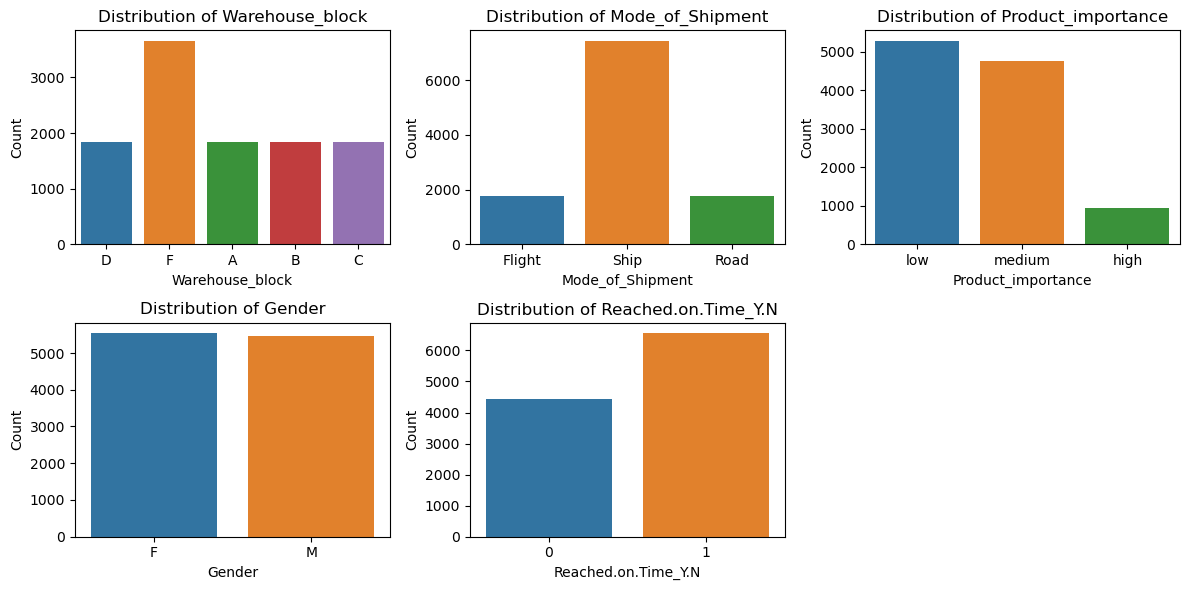

In [12]:
# Explore categorical variables
categorical_vars = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

# Plot distribution of categorical variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### Customer Gender Distribution

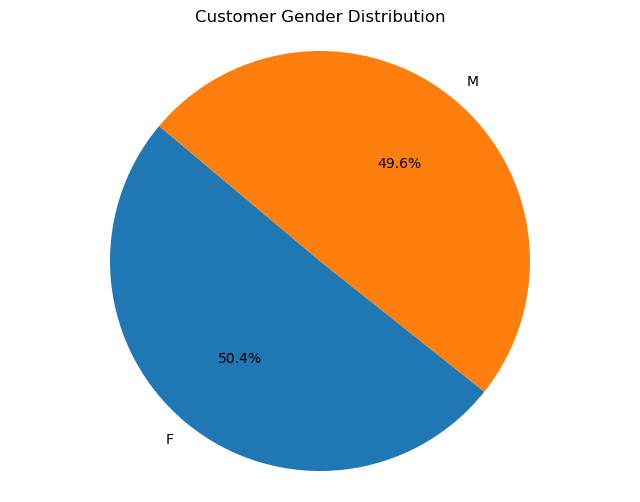

In [13]:

# Calculate the counts for each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Product Properties

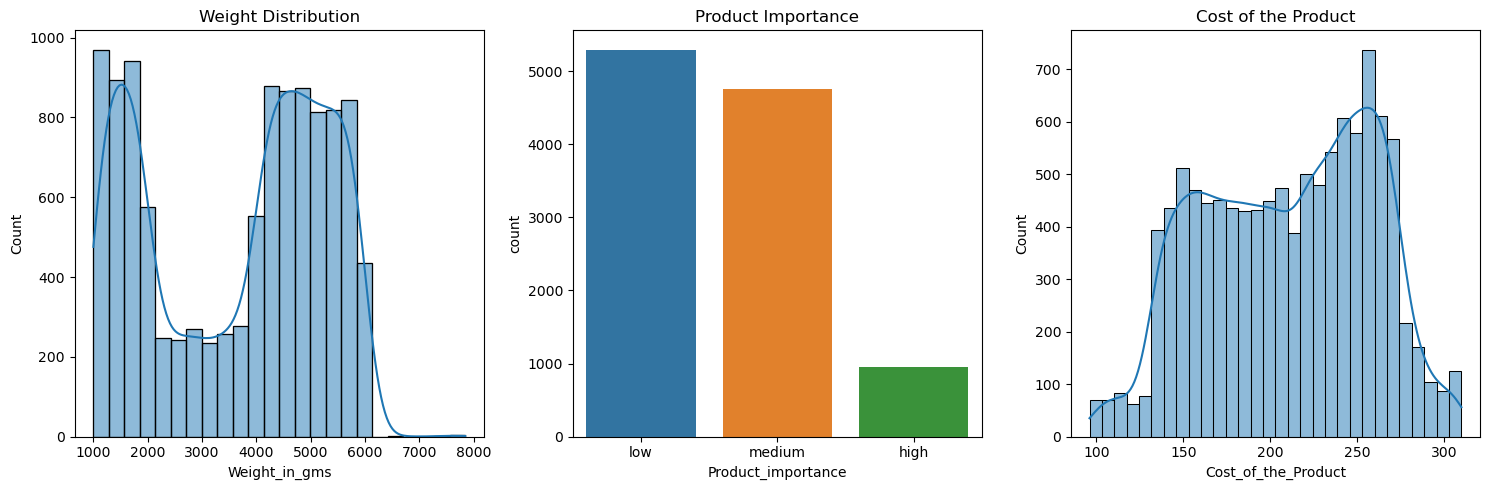

In [14]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Cost of the Product')

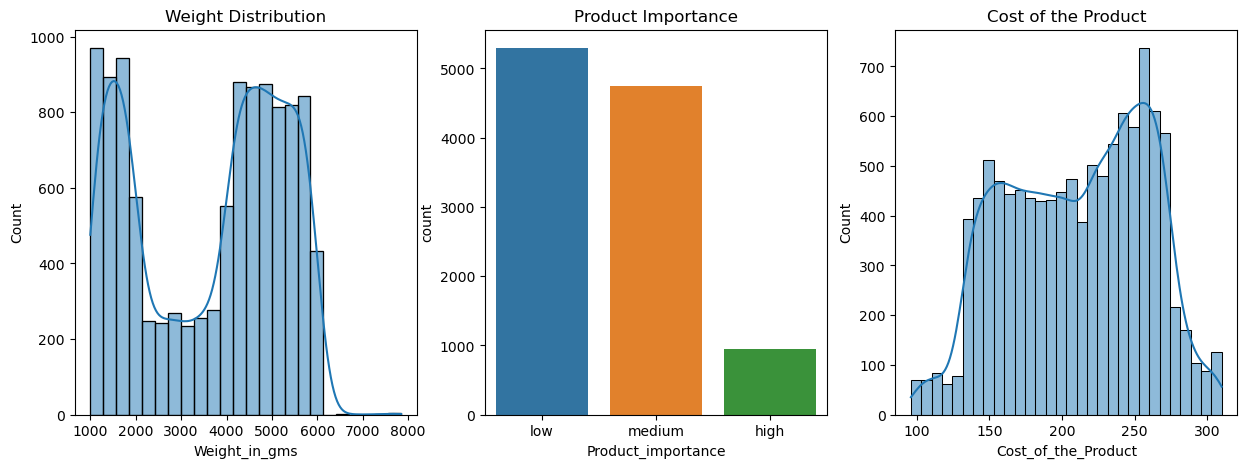

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

These three graphs explain the distribution of product pproperties:
1. Looking at the weight distribution, we can see that majority of the products weigh either between 1000-2000 grams and 4000-6000 grams . This tells us that these are the most common weights for our products.
2. The graph about product importance tells us that most of our products are considered either low or medium importance. This means they're not seen as extremely crucial items.
3.  The graph showing the cost of our products reveals that many of them are priced between 150-200 dollars or 225-275 dollars

Overall, it seems like our products are mostly lightweight, have medium importance, and fall within the 150-275 dollar price range.

#### Logistics

Text(0.5, 1.0, 'Reached on Time')

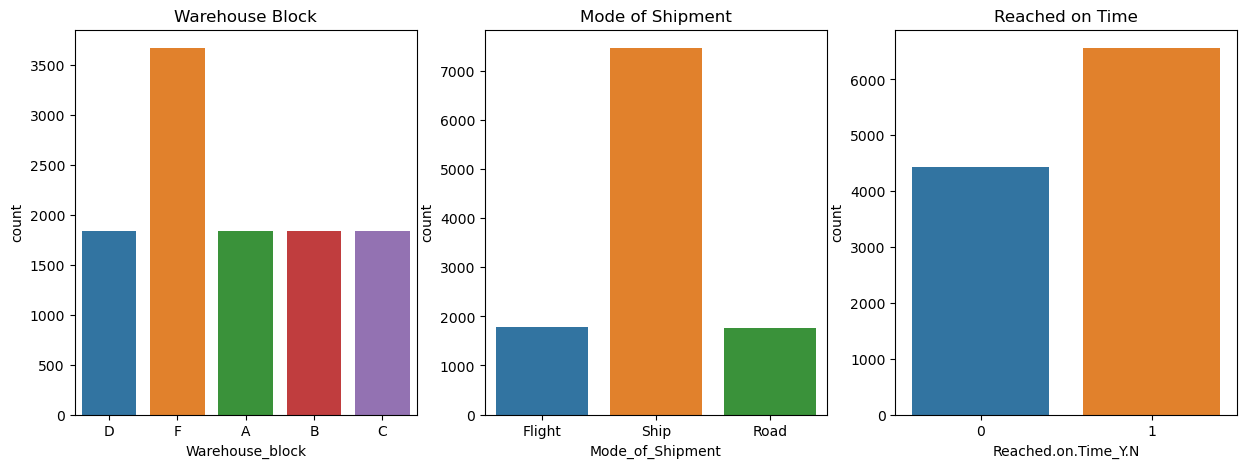

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

The  graphs provide insights into the logistics and delivery of our products.

In the initial visualization, we observe that Warehouse F houses the highest number of products, totaling 3500, while the remaining warehouses contain a roughly equivalent number of product . Moving to the second graph, which focuses on shipment methods, we note that the majority of products are transported via ship, with approximately 2000 products being shipped by flight and road combine
. Finally, the third graph illustrates product delivery timeliness, revealing that the number of product s delivered on time exceeds tse notot delivered on time.

Based on these observations, it is reasonable to infer that Warehouse F may be situated near a seaport, as it holds the highest quantity of products and the predominant shipping method for these products is via ship.

#### Customer Experience

Text(0.5, 1.0, 'Discount Offered')

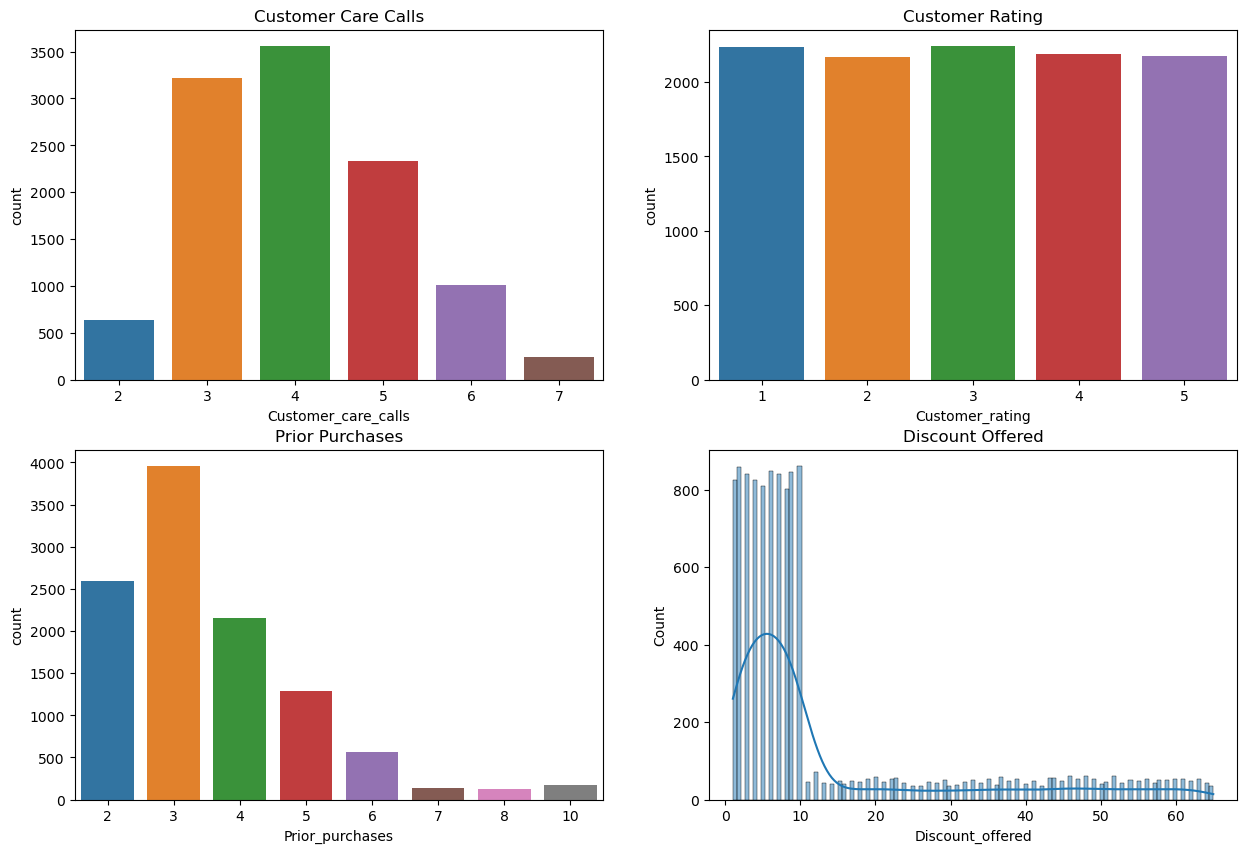

In [17]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

The described graphs provide insights into the customer experience based on their interactions with our services.

In the initial visualization, we observe the distribution of customer care calls, indicating that the majority of customers have made 3-4 calls. This pattern suggests potential issues with product delivery that customers may be encountering. Moving to the second graph, which displays customer ratings, we note a relatively balanced distribution across all ratings, although there is a slightly higher count in rating 1, indicating dissatisfaction with the service

The third graph illustrates prior purchase behavior, revealing that most customers have made 2-3 prior purchases. This suggests that customers who have previously purchased items are satisfied with our service and are likely to make repeat puse. es. Finally, the fourth graph depicts discounts offered on products, with the majority receiving discounts ranging from 0-10%. This indicates that the company does not heavily discount its products.

Overall, these insights suggest areas where improvements may be needed in customer service and satisfaction, as well as opportunities to increase customer loyalty through repeat purchases.hases.hases.

#### Product Properties and Product Delivery

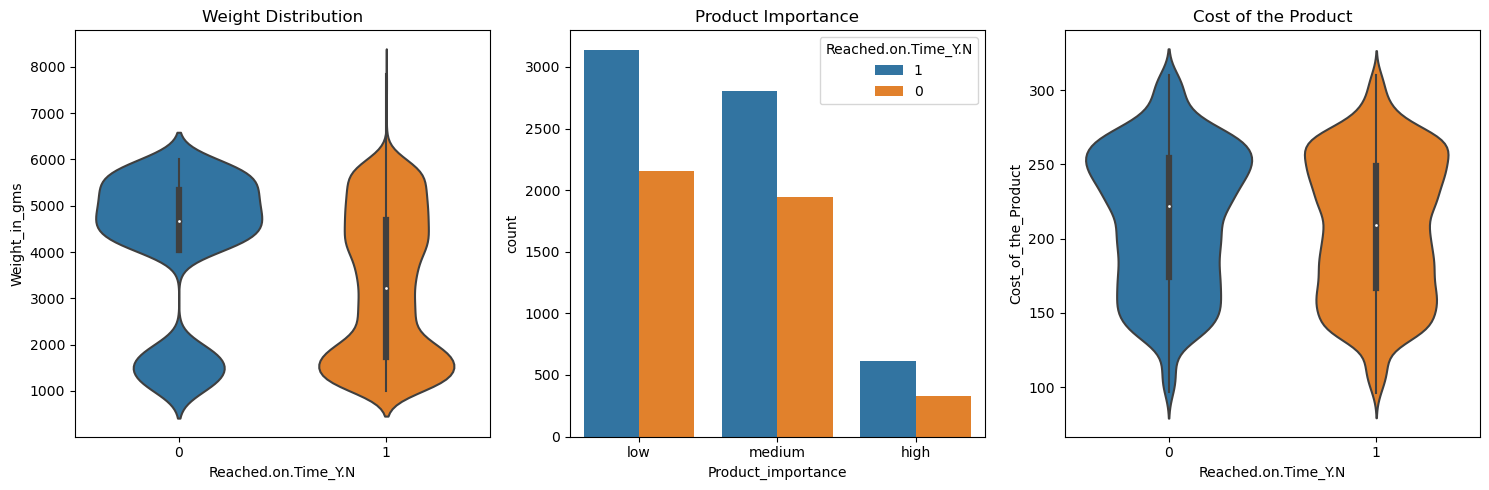

In [18]:
 fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(y=df['Weight_in_gms'], ax=ax[0], kde=True, x=df['Reached.on.Time_Y.N']).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data=df, ax=ax[1], hue=df['Reached.on.Time_Y.N'].astype(str)).set_title('Product Importance')
sns.violinplot(y=df['Cost_of_the_Product'], ax=ax[2], kde=True, x=df['Reached.on.Time_Y.N']).set_title('Cost of the Product')

plt.tight_layout()
plt.show()

#### Logistics and Product Delivery

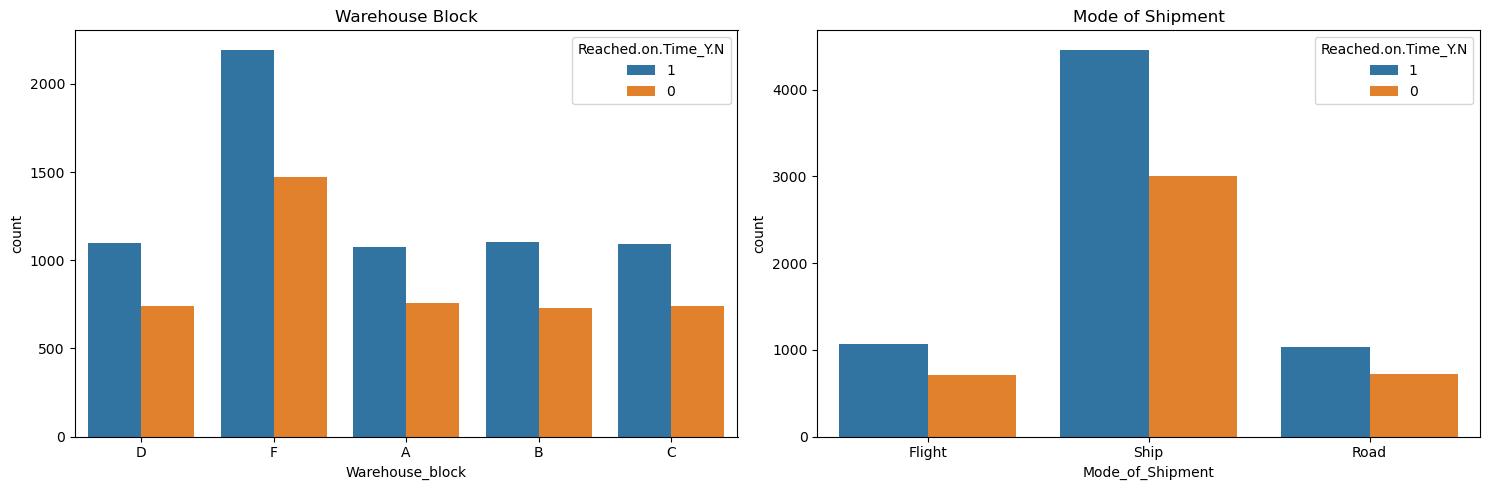

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Warehouse_block', data=df, ax=ax[0], hue=df['Reached.on.Time_Y.N'].astype(str)).set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment', data=df, ax=ax[1], hue=df['Reached.on.Time_Y.N'].astype(str)).set_title('Mode of Shipment')

plt.tight_layout()
plt.show()


These graphs show how logistics and delivery times are related. Since most products come from Warehouse F, it's likely close to a seaport, as many items are shipped by sea. In both graphs, the difference in timely versus delayed deliveries is consistent across all warehouses and shipping methods. This indicates that neither logistics nor shipping method has a big impact on delivery times.

#### Customer Experience and Product Delivery

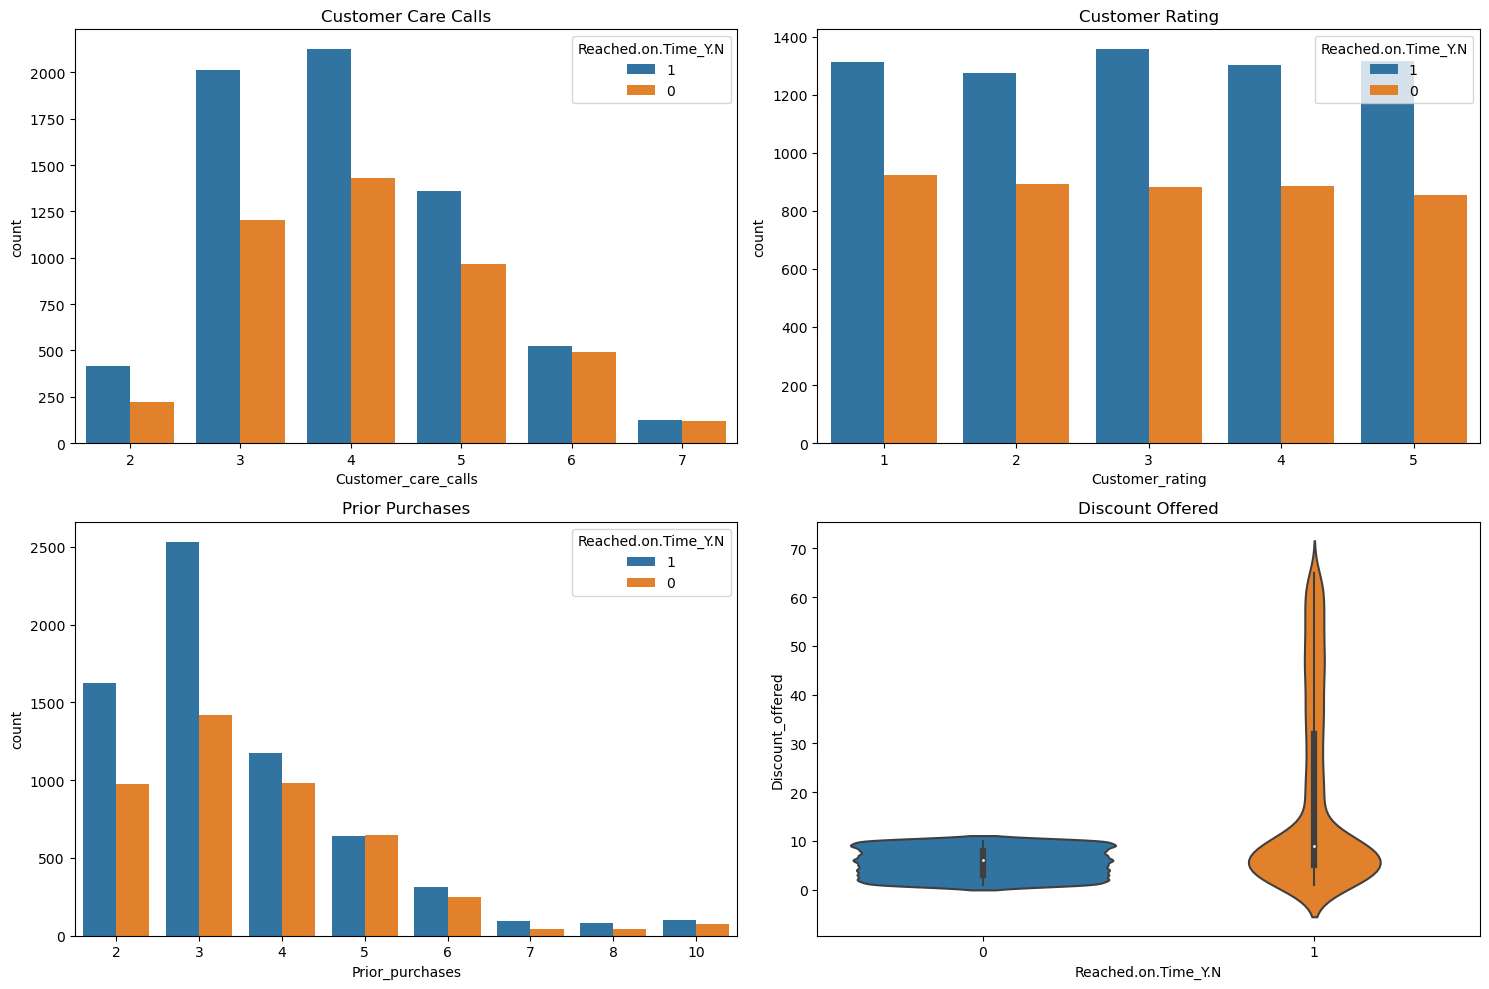

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='Customer_care_calls', data=df, ax=ax[0, 0], hue=df['Reached.on.Time_Y.N'].astype(str)).set_title('Customer Care Calls')
sns.countplot(x='Customer_rating', data=df, ax=ax[0, 1], hue=df['Reached.on.Time_Y.N'].astype(str)).set_title('Customer Rating')
sns.countplot(x='Prior_purchases', data=df, ax=ax[1, 0], hue=df['Reached.on.Time_Y.N'].astype(str)).set_title('Prior Purchases')
sns.violinplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, ax=ax[1, 1]).set_title('Discount Offered')

plt.tight_layout()
plt.show()


Understanding customer experience and responding to the services provided by the e-commerce company is crucial. The depicted graphs shed light on the correlation between customer experience and product delivery. 
In the first graph, which focuses on customer care calls and product delivery, we observe that as the number of customer calls increases, the difference between timely and delayed deliveries decreases. This suggests that customers become more anxious about their products with delivery delays, prompting them to contact customer care. 
Moving to the second graph, which explores customer ratings and product delivery, we notice that customers with higher ratings have a greater number of products delivered on time. 
The third graph illustrates the relationship between a customer's prior purchases and product delivery. It shows that customers with more prior purchases tend to receive more products on time, potentially leading to repeat purchases. 
Lastly, the fourth graph delves into the impact of discounts offered on product delivery. We observe that products with discounts ranging from 0-10% have a higher number of delayed deliveries, whereas those with discounts exceeding 10% are more likely to be delivered on time.

## Data Preprocessing 2

#### Label Encoding the Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


## Correlation Matrix Heatmap

<Axes: >

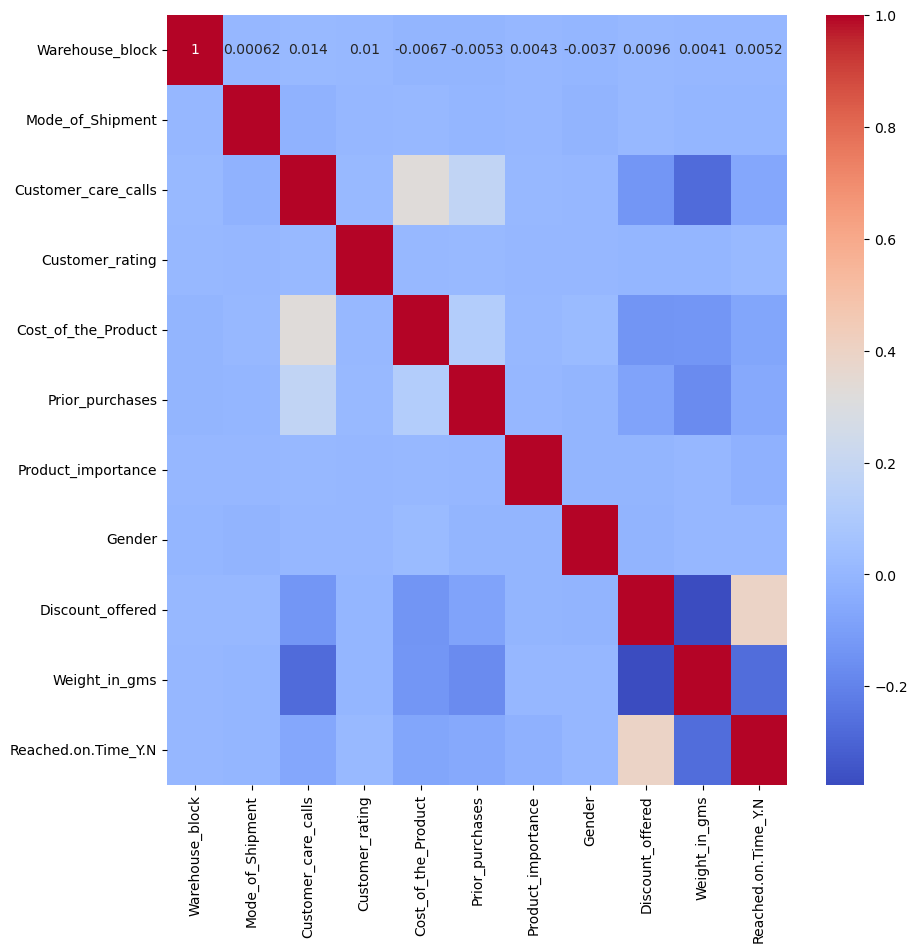

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In the correlation matrix heatmap, we can see that there is positive correlation between cost of product and number of customer care calls.

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

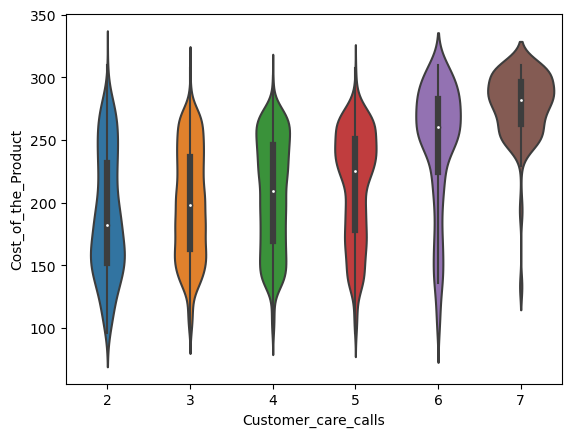

In [24]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

It is clear that customer are more concern regarding the delivery of the product when the cost of the product is high. This is the reason that they call the customer care to know the status of the product. So, it is important to make sure the delivery of the product is on time when the cost of the product is high.

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

## Model Building

I will be using the following models to predict the product delivery:

- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression
- K Nearest Neighbors

#### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_classifier.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.6581818181818182


In [27]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [28]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [29]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [30]:
#predicting the test set results
rfc_pred = rfc.predict(X_test)

#### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_classifier.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.6395454545454545


In [32]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [33]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [34]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [35]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

#fitting the model
lr.fit(X_train, y_train)

#Training accuracy
lr.score(X_train, y_train)

#predicting the test set results
lr_pred = lr.predict(X_test)

print('Training accuracy: ', lr.score(X_train, y_train))

Training accuracy:  0.6356404136833731


#### K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K Nearest Neighbors Accuracy:", knn_accuracy)

K Nearest Neighbors Accuracy: 0.6536363636363637


## Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

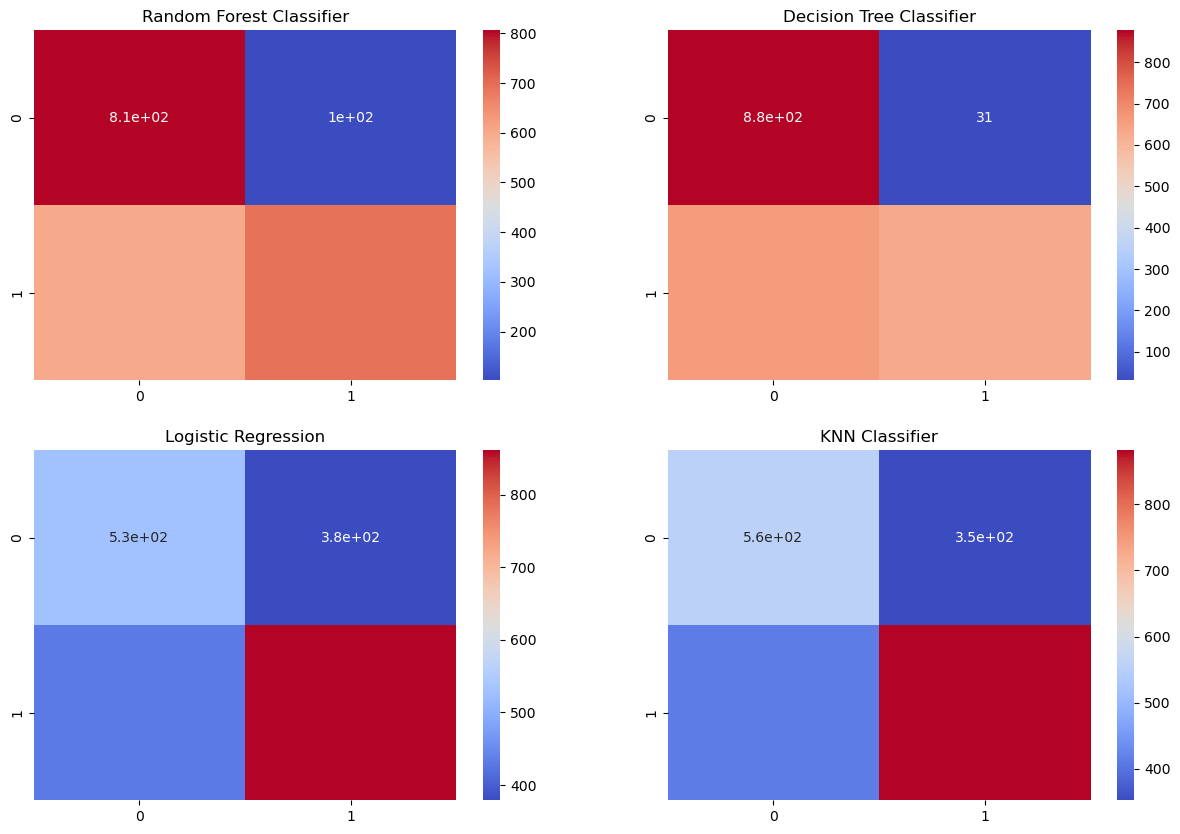

In [40]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [41]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       908
           1       0.69      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      

##### Model Comparison

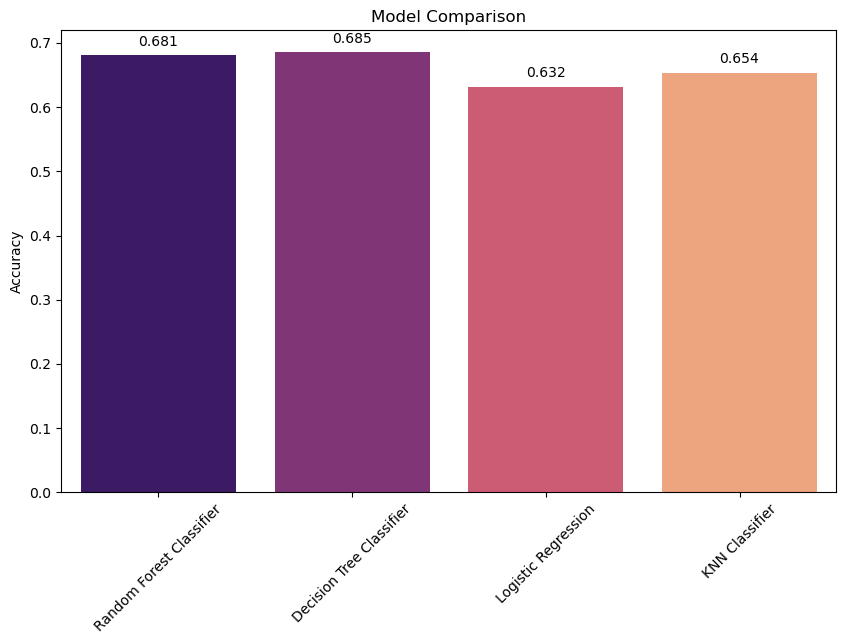

In [42]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=models, y=accuracy, palette='magma')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

# Add the accuracy scores inside the bars
for i, v in enumerate(accuracy):
    barplot.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.show()


Based on these metrics, the Decision Tree Classifier has the highest overall accuracy (0.69) and a relatively balanced performance in terms of precision, recall, and F1-score across both classes. Therefore, the Decision Tree Classifier could be considered the best model among the four for this specific dataset and problem.